In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc

from sklearn.manifold import TSNE

In [3]:
# font 전역 설정
mpl.font_manager._rebuild() # 로컬시스템에 font 설치 이후, matplotlib의 font_manager rebuild를 꼭 해줘야함!!

font_fname = '/Library/Fonts/NanumBarunGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()

rc('font', family=font_name)
mpl.rcParams.update({'font.size': 12.0})

print(font_name)

NanumBarunGothic


In [14]:
### {word: embedding} 형태의 파일 불러오기

w2v = pd.read_parquet("/Users/jrpark/PycharmProjects/nlp/embeddings/w2v_v5.parquet")
print(w2v.shape)
w2v.head()

(1833, 3)


,WORD,V1,V2
0,히타,0.387607,-0.606035
1,스무디,1.303653,0.755741
2,내담,0.822214,-1.851703
3,차이,-0.585241,-0.728259
4,여객,-0.750866,-3.624450


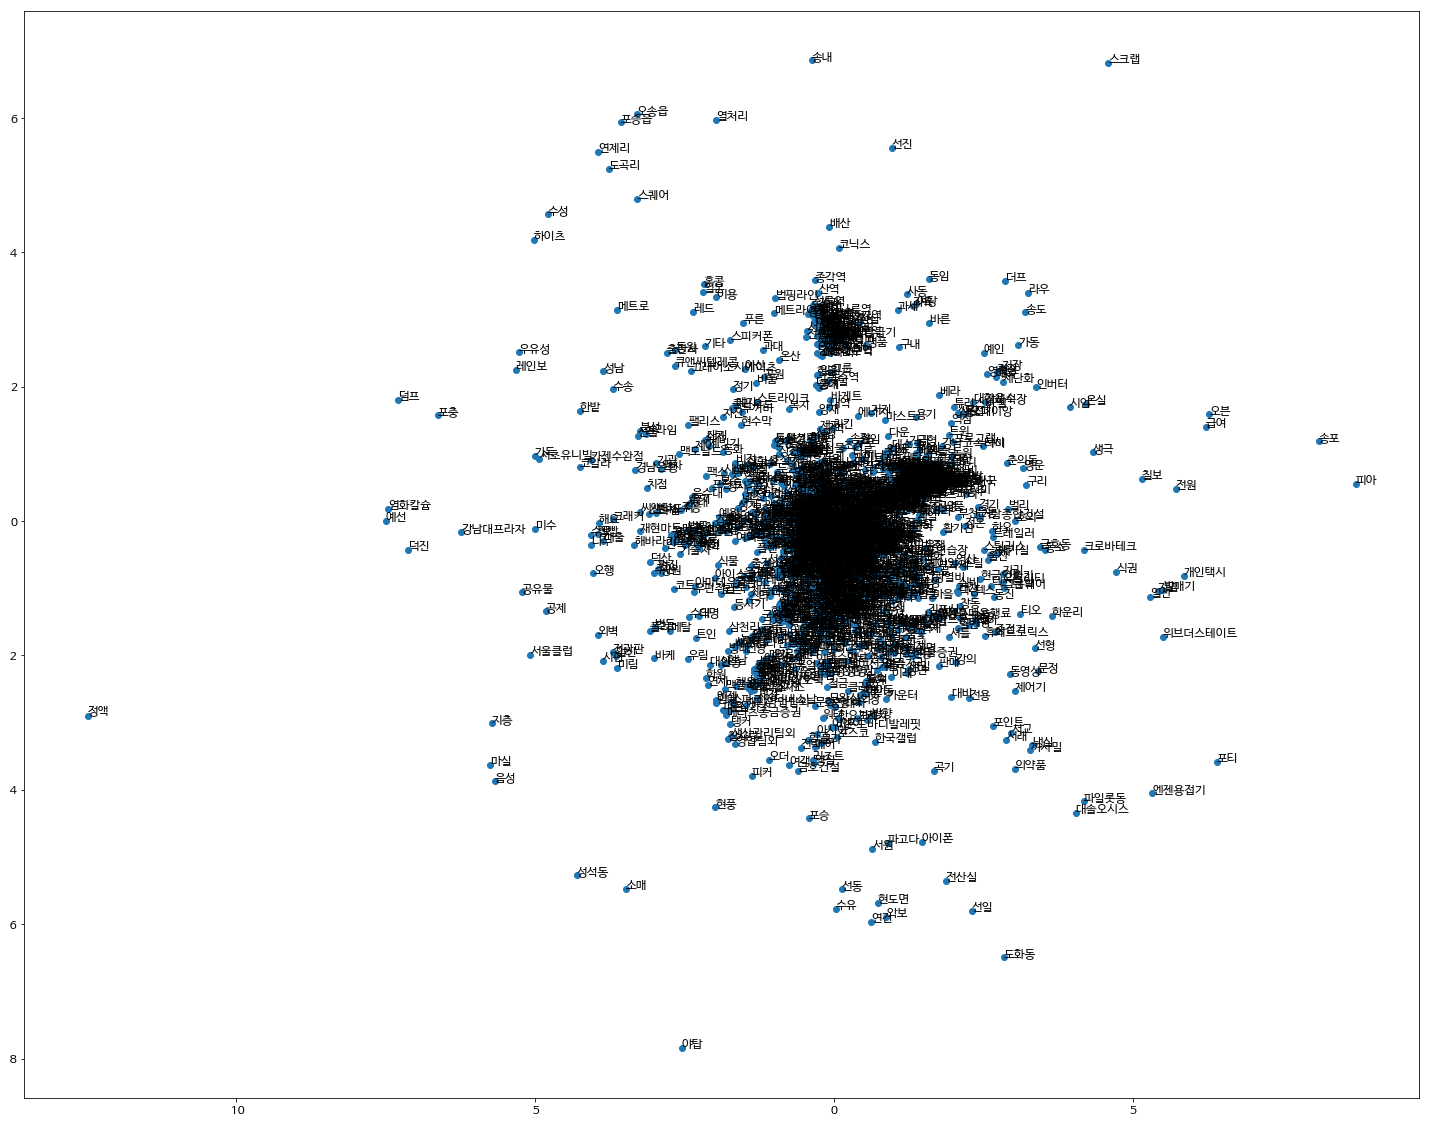

In [15]:
x1 = w2v['V1']
x2 = w2v['V2']

# plt.figure(figsize=(20, 15))
fig, ax = plt.subplots(figsize=(25,20))
fig.size = (30,20)
ax.scatter(x1, x2)

for i, txt in enumerate(w2v['WORD']):
    ax.annotate(txt, (x1[i], x2[i]))

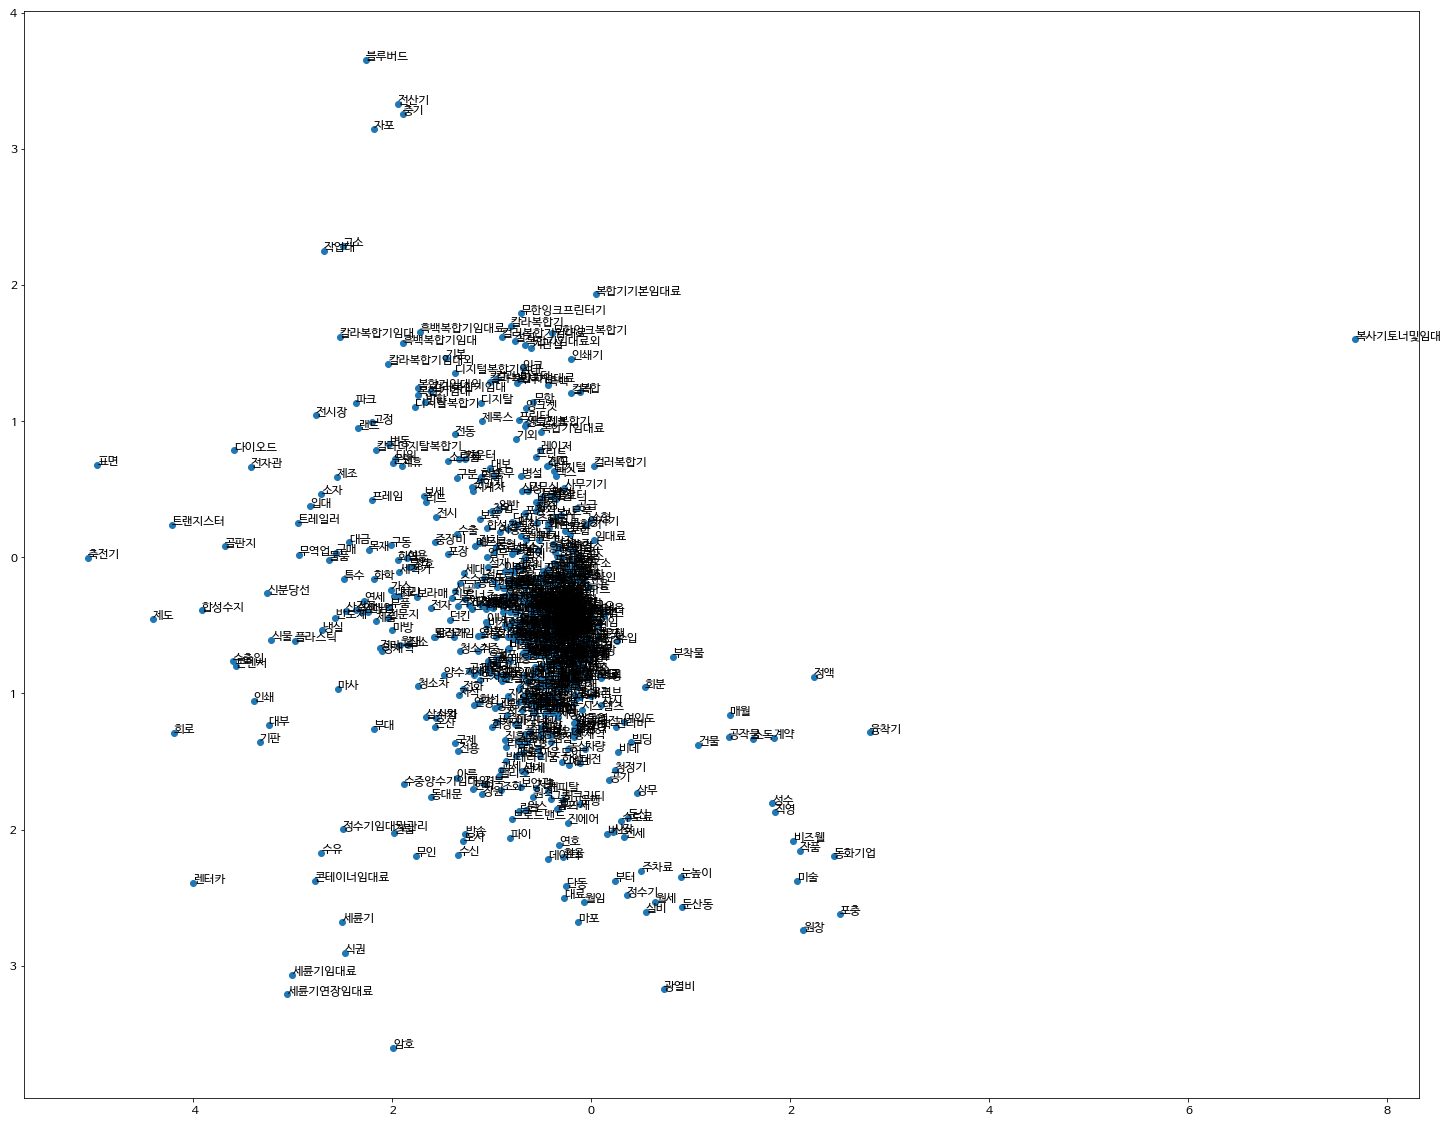

In [7]:
x1 = w2v['V1']
x2 = w2v['V2']

# plt.figure(figsize=(20, 15))
fig, ax = plt.subplots(figsize=(25,20))
fig.size = (30,20)
ax.scatter(x1, x2)

for i, txt in enumerate(w2v['WORD']):
    ax.annotate(txt, (x1[i], x2[i]))

In [5]:
### embedding 칼럼을 차원 수만큼 각 칼럼 값으로 분리 저장

splitedw2v = [str(x).replace("[","").replace("]","").replace("\n","").split(" ") for x in w2v['embedding']]

print(np.unique([len([x for x in vec if x != '']) for vec in splitedw2v ]))

splitedw2v = pd.DataFrame( [ [x for x in vec if x != ''] for vec in splitedw2v ] )

splitedw2v.head()

[100]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.04084121,-0.15909249,-0.1786989,0.41375035,0.2855725,-0.262732,0.3468308,0.604273,-0.06509109,0.20870212,...,-0.4933663,0.55679536,-0.13293973,0.1914846,0.30037108,-0.09574001,0.10035484,0.29387528,0.34542942,0.48358124
1,-0.15286699,-0.15720005,-0.02557765,-0.06426185,0.09214412,-0.06429413,-0.10352621,-0.06013217,0.0215294,-0.05813016,...,0.01124506,-0.07659407,-0.015974,-0.01542922,-0.08248971,-0.2283308,0.04812585,0.04424813,-0.0413114,-0.00630291
2,1.02666222e-01,-1.25917360e-01,1.00595325e-01,-1.40043467e-01,5.08647365e-03,2.20898002e-01,-1.03538752e-01,2.02821657e-01,-1.14936098e-01,1.21112444e-01,...,-4.76974398e-02,-8.99179354e-02,-4.98159342e-02,-4.22460288e-02,-2.32601762e-02,-4.70975041e-01,1.20237999e-01,-1.61544621e-01,-4.06638235e-02,-2.42332265e-01
3,-0.07342835,-0.04500878,-0.18907006,0.12956005,0.07495748,0.03016745,-0.03290667,0.08228563,-0.05488271,0.07004773,...,0.03311953,0.02046521,-0.00659354,-0.0076527,0.08753654,-0.08407667,0.09049489,0.02166936,-0.03543655,0.00175604
4,-0.06504665,0.08592659,-0.017619,0.00764539,-0.03567922,0.04438789,-0.03229154,-0.10757249,-0.06369198,-0.02454107,...,-0.01078778,0.10071455,0.01775458,-0.02338067,0.03670967,0.02561422,0.06047219,-0.04742255,0.04813713,0.03431408


In [6]:
### transforming 2d using TSNE

tsne = TSNE(n_components=2, random_state=0) # 2차원; n_components = 2

x_2d = tsne.fit_transform(splitedw2v)

In [7]:
### {ITEM_NM: TEXT} 각 품목명에 해당되는 

itemInfo = pd.read_parquet("./data/itemInfoAgg_except_itemNm.parquet")
print(itemInfo.shape)
itemInfo.head()

(13222, 2)


,ITEM_NM,SC_BC_ITEM
0,accuchip,이화학용기기+생명공학관련용역+외+제조+서비스업+실험실용+진단용시약+제조업+이화학용기...
1,autotransfusion,의약품+도매업+식품+의료기기+도매+및+소매업+도소매+의료기기판매+도+소매+의약품+도...
2,cr,양약+제조업+양약+도매+온라인의료정보사업외+서비스+도매+의료기기+외+도+소매+양약+...
3,hbsagii,양약+임대+제조+도매+부동산+의료기구+시약+도소매+양약+임대+제조+도매+부동산+시약...
4,hibiscus,접착제+조미식품+제조+도매+건강기능식품+도소매+접착제+조미식품+제조+도매+다류+제조...


In [10]:
import random

n_sample = 500
sampleIdxs = random.sample(range(len(w2v.word)), n_sample)

wordDict = {key: value for (value, key) in enumerate(w2v.word)}

# senSplited = [str(x).split('+') for x in itemInfo.SC_BC_ITEM[:n_sample]]
senSplited = [str(x).split('+') for x in itemInfo.loc[sampleIdxs,'SC_BC_ITEM']]

####

wordIdxs = [[wordDict[x] for x in sen if x in wordDict] for sen in senSplited]

senVecs = np.array([ list(np.array(x_2d[idxs, :]).mean(axis=0)) for idxs in wordIdxs ])

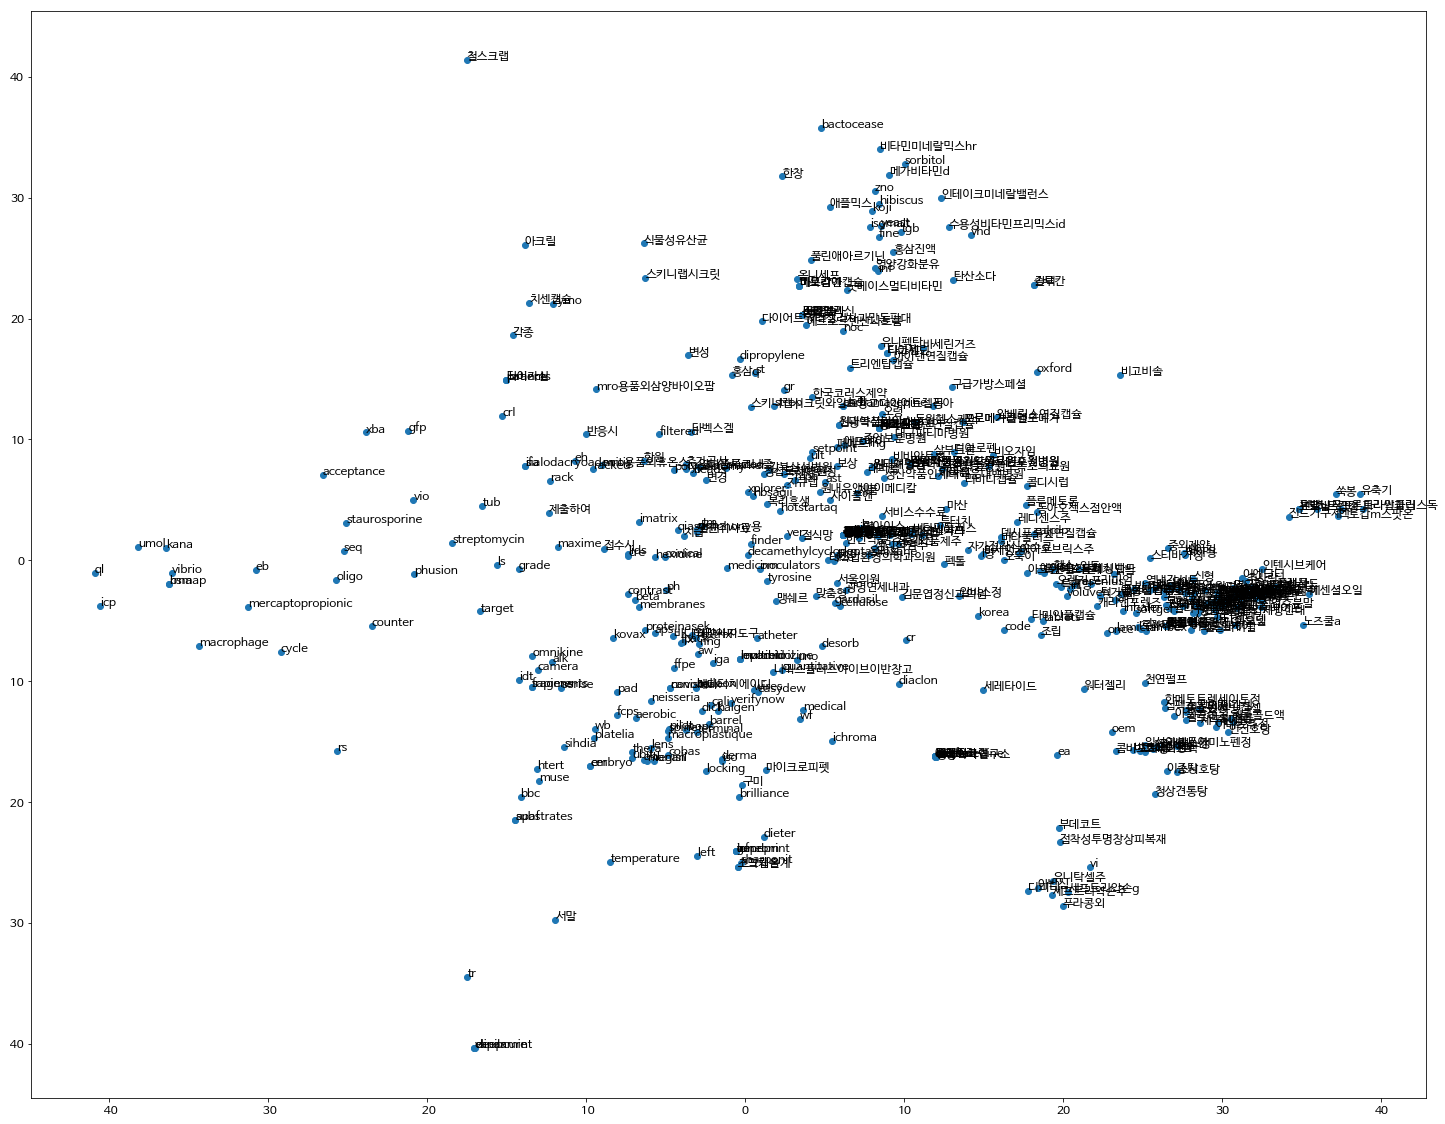

In [11]:
x1 = senVecs[:,0]
x2 = senVecs[:,1]
n = itemInfo.loc[sampleIdxs,'ITEM_NM']

# plt.figure(figsize=(20, 15))
fig, ax = plt.subplots(figsize=(25,20))
fig.size = (30,20)
ax.scatter(x1, x2)

for i, txt in enumerate(n):
    ax.annotate(txt, (x1[i], x2[i]))

In [25]:
[1,2,3,4,5][3]

4

In [9]:
from gensim.models import KeyedVectors
import numpy as np

In [10]:
fastKo = KeyedVectors.load_word2vec_format('./data/wiki.ko.vec')

In [11]:
fastKoVocab = fastKo.vocab
fastKoEmb = np.array([fastKo.word_vec(k) for k in fastKoVocab.keys()])

In [13]:
np.shape(fastKoEmb)

(879129, 300)

In [22]:
print(list(fastKoVocab.keys())[:100])

['</s>', '.', ',', ')', '(', '년', "'", '-', '분류', '월', '일', '#', '}', '있다', '/', '~', '이', '《', '》', '는', '수', '제', '의', '넘겨주기', '은', '·', '있는', '그', '역', 'kst', '대한민국의', '\\', '에', '토론', '선수', '바깥', '고리', '%', '한', '및', '를', '?', '축구', '한다', 'the', '대한', '영화', 'a', '을', '주', '가', '명', '년에', '다른', '같은', '로', '되었다', 'm', '등', '회', 'of', '이후', '중', '그는', '미국의', '함께', '때', '또한', '에서', '현재', '때문에', '같이', '대', '후', '!', '사람', '위해', '"', '것을', '더', '배우', '시', '일본', '대한민국', '태어남', '→', '또는', '그리고', '두', '하는', 'kbs', '와', '현', '미국', '그러나', 's', '된다', '가장', '동문', '그의']


In [18]:
fastKoEmb[:3,:10]

array([[ 0.40987  ,  0.0053006, -1.5832   , -1.0234   ,  0.27239  ,
        -1.2325   , -0.285    , -0.59057  , -0.71622  , -0.78779  ],
       [-0.030115 ,  0.13632  , -0.13244  ,  0.1363   , -0.10425  ,
         0.0058921, -0.061741 , -0.13104  ,  0.12687  , -0.042134 ],
       [-0.085165 ,  0.14352  , -0.24257  , -0.15071  , -0.13949  ,
        -0.21075  , -0.04355  , -0.12297  ,  0.12131  , -0.20309  ]],
      dtype=float32)